# Importing Libraries

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [164]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [165]:
df.drop(columns=  ['Pregnancies', 'SkinThickness'], inplace=True)

In [166]:
df.isna().sum()

Glucose                     0
BloodPressure               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [167]:
len(df)

768

# Exploratory Data Analysis And Visualizations

## Mathematical Relation

In [185]:
df.describe()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Correlation Matrix and HeatMap

In [169]:
corr_mat = df.corr()
corr_mat

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.152590,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.152590,1.000000,0.088933,0.281805,0.041265,0.239528,0.065068
Insulin,0.331357,0.088933,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.221071,0.281805,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.137337,0.041265,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.263514,0.239528,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.466581,0.065068,0.130548,0.292695,0.173844,0.238356,1.000000


## HeatMap

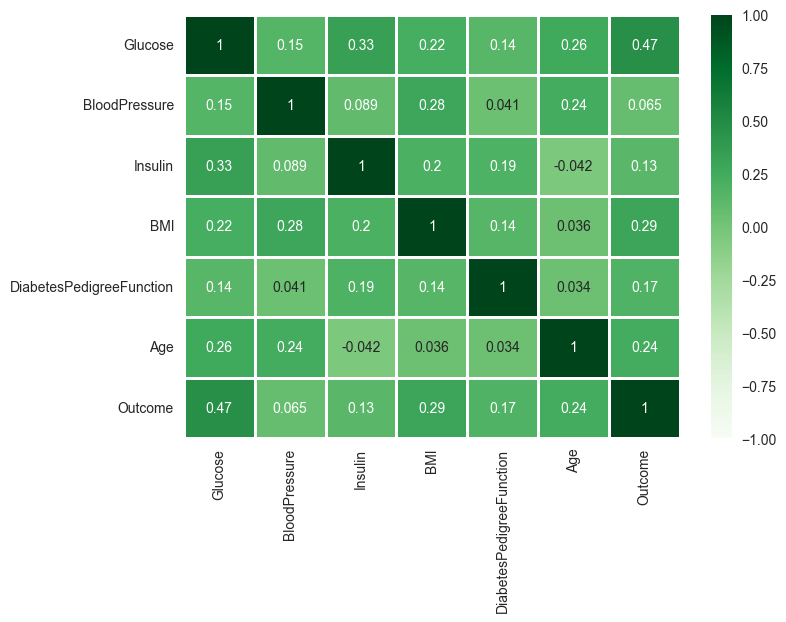

In [170]:
sns.heatmap(data = corr_mat, annot = True, cmap = 'Greens', linewidths=2, vmin=-1, vmax=1)
plt.show()

## BoxPlot

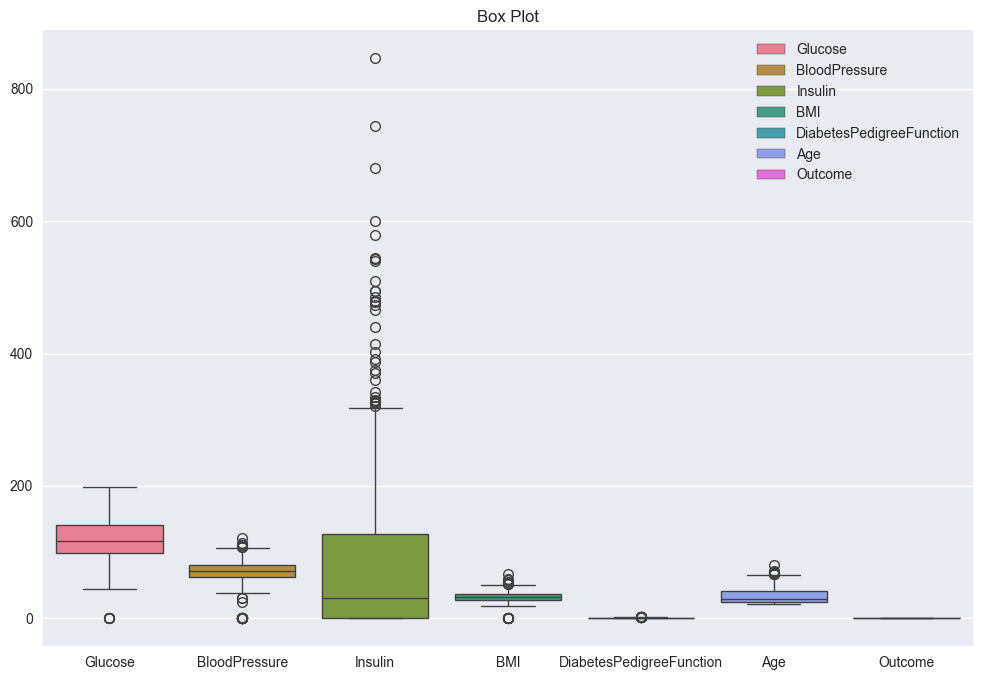

In [171]:
plt.figure(figsize=(12, 8))
sns.boxplot(df, legend='brief')
plt.title('Box Plot')
plt.show()

## Violin Plot

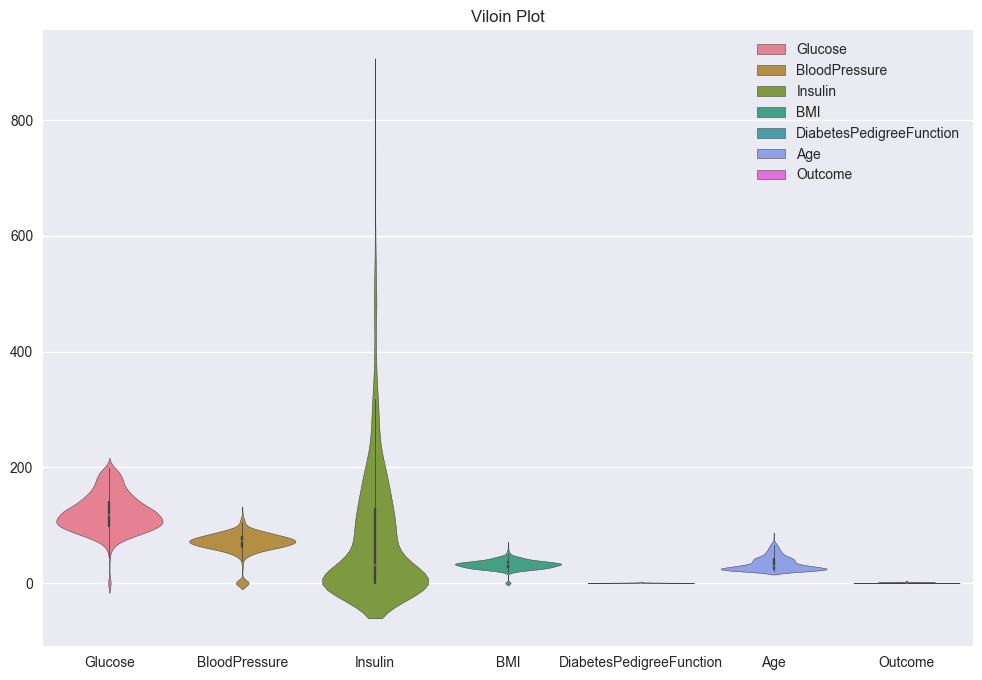

In [172]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, legend='brief')
plt.title('Viloin Plot')
plt.show()

## HistPlot (Frequency)

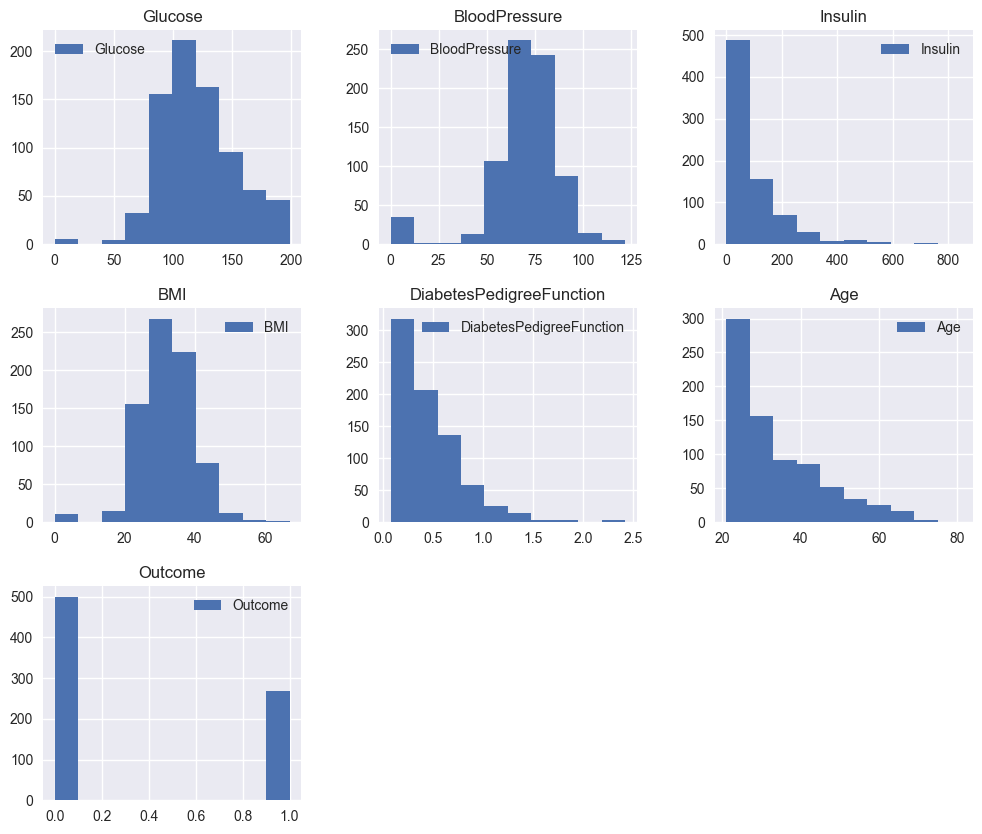

In [173]:
df.hist(figsize=(12, 10), legend=True)
plt.title('HistPlots')
plt.show()

## PainPlot(Scatter for all columns)

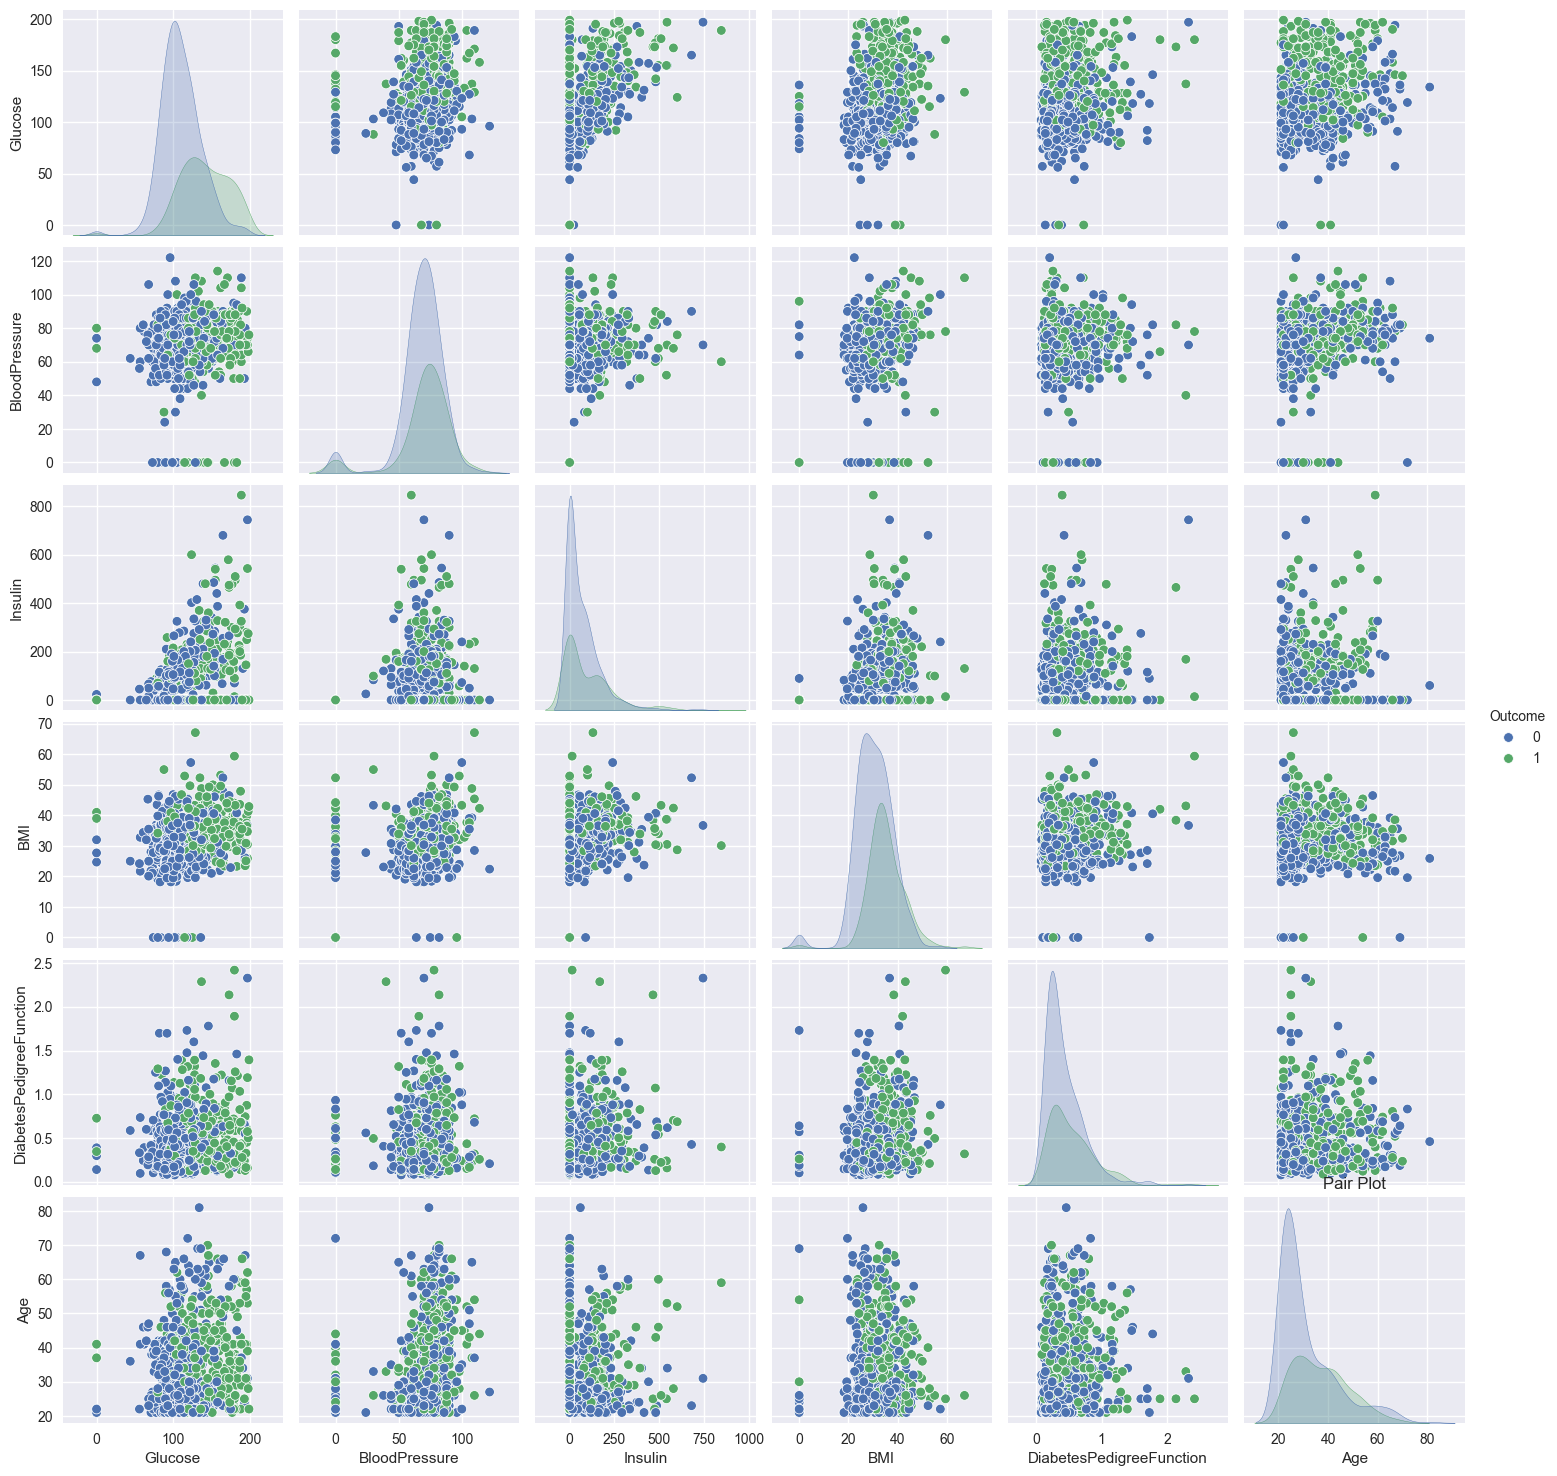

In [175]:
sns.pairplot(df, hue = 'Outcome')
plt.title('Pair Plot')
plt.show()

## Histplot

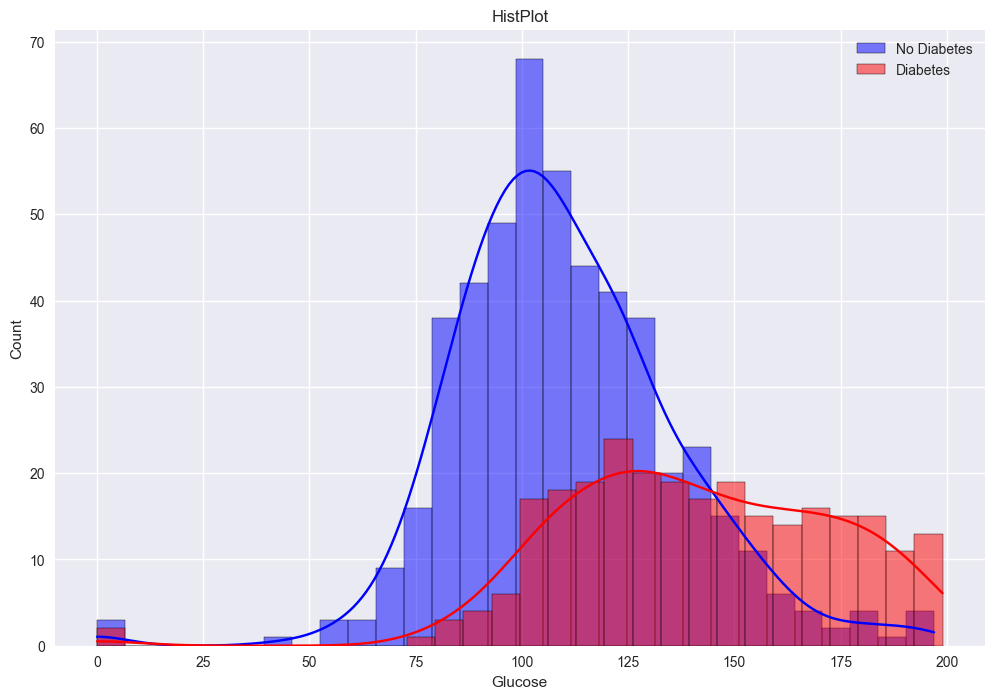

In [174]:
plt.figure(figsize=(12, 8))
sns.histplot(df[df['Outcome'] == 0]['Glucose'], label='No Diabetes', kde=True, color='blue', bins=30)
sns.histplot(df[df['Outcome'] == 1]['Glucose'], label='Diabetes', kde=True, color='red', bins=30)
plt.title('HistPlot')
plt.legend()
plt.show()

## PiePlot

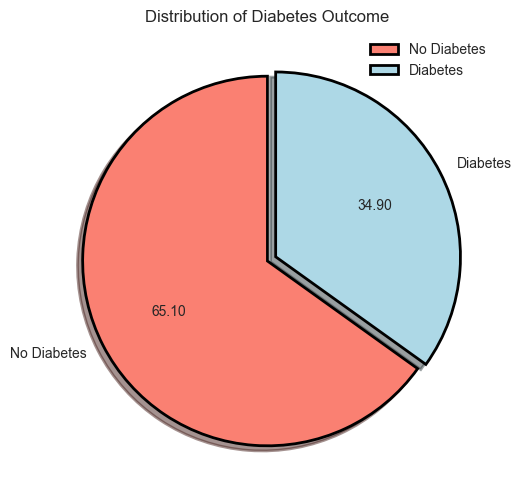

In [176]:
outcome_counts = df['Outcome'].value_counts()
labels = ['No Diabetes', 'Diabetes']
explode = [0, 0.05]
plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=labels, autopct='%.2f', shadow=True, colors=['salmon', 'lightblue'],explode=explode, startangle=90, wedgeprops = {'edgecolor': 'black', 'linewidth' : 2})
plt.title('Distribution of Diabetes Outcome')
plt.legend()
plt.show()

# Train-Test-Split and Scaling

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns='Outcome')
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Imputing Missing Values

In [178]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cols = ['BloodPressure', 'Insulin', 'BMI']
imputer = SimpleImputer(missing_values=0, strategy='mean')
ct = ColumnTransformer(transformers=[('imputer', imputer, cols)], remainder='passthrough')
X_train_imputed = ct.fit_transform(X_train)
X_test_imputed = ct.transform(X_test)

# Profile Report

In [179]:
from ydata_profiling import ProfileReport

X_train_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)
y_train_df = pd.DataFrame(y_train, columns=['Outcome'])
y_test_df = pd.DataFrame(y_test, columns=['Outcome'])

merged_df_x = pd.concat([X_train_df, X_test_df], axis=0)
merged_df_y = pd.concat([y_train_df, y_test_df], axis=0)

merged_df = merged_df_x.merge(merged_df_y, left_index=True, right_index=True)
pf = ProfileReport(merged_df, dark_mode=True, title='Profile Report')
pf.to_file('Diabetic Profile Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Chandan Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'cannot reindex on an axis with duplicate labels')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [180]:
X_train_scaled, X_test_scaled

(array([[-1.15139792, -3.75268255, -0.70120553, -4.13525578, -0.49073479,
         -1.03594038],
        [-0.27664283,  0.68034485, -0.70120553, -0.48916881,  2.41502991,
          1.48710085],
        [ 0.56687102, -1.2658623 ,  0.01344832, -0.42452187,  0.54916055,
         -0.94893896],
        ...,
        [-0.62029661,  0.89659009, -0.70120553,  1.76054443,  1.981245  ,
          0.44308379],
        [ 0.62935353, -3.75268255, -0.70120553,  1.34680407, -0.78487662,
         -0.33992901],
        [ 0.12949347,  1.43720319, -0.70120553, -1.22614383, -0.61552223,
         -1.03594038]]),
 array([[-7.14020375e-01, -6.17126581e-01,  9.34749058e-01,
          2.60735607e-01, -1.16372467e-01,  8.78090895e-01],
        [-2.76642826e-01,  3.01915686e-01, -7.01205532e-01,
          4.80535176e-01, -9.54231000e-01, -1.03594038e+00],
        [-4.01607840e-01, -2.92758722e-01, -7.01205532e-01,
         -1.53004759e-01, -9.24519704e-01, -1.03594038e+00],
        [-4.32849094e-01,  5.72222235e-0

# Training Model

In [181]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test_scaled)

metrics = {}
for name, prediction in predictions.items():
    metrics[name] = {
        'Accuracy': accuracy_score(y_test, prediction),
        'Precision': precision_score(y_test, prediction),
        'Recall': recall_score(y_test, prediction),
        'F1 Score': f1_score(y_test, prediction),
        'ROC AUC': roc_auc_score(y_test, prediction)
    }

metrics

{'Logistic Regression': {'Accuracy': 0.7597402597402597,
  'Precision': 0.6730769230769231,
  'Recall': 0.6363636363636364,
  'F1 Score': 0.6542056074766355,
  'ROC AUC': 0.7323232323232323},
 'Random Forest': {'Accuracy': 0.7337662337662337,
  'Precision': 0.6166666666666667,
  'Recall': 0.6727272727272727,
  'F1 Score': 0.6434782608695652,
  'ROC AUC': 0.7202020202020203},
 'Decision Tree': {'Accuracy': 0.7337662337662337,
  'Precision': 0.6129032258064516,
  'Recall': 0.6909090909090909,
  'F1 Score': 0.6495726495726496,
  'ROC AUC': 0.7242424242424242},
 'K Nearest Neighbors': {'Accuracy': 0.7532467532467533,
  'Precision': 0.6545454545454545,
  'Recall': 0.6545454545454545,
  'F1 Score': 0.6545454545454545,
  'ROC AUC': 0.7313131313131312},
 'Support Vector Classifier': {'Accuracy': 0.7467532467532467,
  'Precision': 0.66,
  'Recall': 0.6,
  'F1 Score': 0.6285714285714286,
  'ROC AUC': 0.7141414141414142}}